In [4]:
import fsspec
import pandas as pd 
import numpy
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

### Importing data

In [2]:

url ="https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df=pd.read_csv(url)

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### data High level Understanding

 a. Find no. of rows & columns in the dataset

 b. Data types of columns.

 c. Info & describe of data in dataframe.


In [5]:
df.shape
print("Number of rows : ",df.shape[0])
print("Number of columns : ",df.shape[1])

Number of rows :  57394
Number of columns :  49


In [6]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [8]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [9]:
df.describe(include='all')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,57071,56748,57394,57394,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
unique,215,6,216,323,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AFG,Europe,Afghanistan,30/10/20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,323,14828,323,215,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,NaN,NaN,NaN,NaN,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,NaN,NaN,NaN,NaN,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,NaN,NaN,NaN,NaN,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,NaN,NaN,NaN,NaN,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,NaN,NaN,NaN,NaN,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000


###  Low Level Data Understanding :

        a. Find count of unique values in location column.

        b. Find which continent has maximum frequency using values counts.

        c. Find maximum & mean value in 'total_cases'.

        d. Find 25%,50% & 75% quartile value in 'total_deaths'.

        e. Find which continent has maximum 'human_development_index'.

        f. Find which continent has minimum 'gdp_per_capita'.


In [10]:
df.location.nunique()

216

In [11]:
df.continent.value_counts().head(1)

Europe    14828
Name: continent, dtype: int64

In [12]:
print("Mean of total_cases :",df.total_cases.mean())
print("Max No. from total_cases: ",df.total_cases.max())

Mean of total_cases : 167797.3688753302
Max No. from total_cases:  55154651.0


In [13]:
#percentile 25,50,75
df.total_deaths.describe()

count    4.436800e+04
mean     6.858639e+03
std      5.578081e+04
min      1.000000e+00
25%      1.300000e+01
50%      8.400000e+01
75%      7.270000e+02
max      1.328537e+06
Name: total_deaths, dtype: float64

In [14]:
df.groupby(df["continent"]).agg({'human_development_index':'max'}).head(1)

,human_development_index
continent,
Africa,0.797


In [15]:
df.groupby(df['continent']).agg({'gdp_per_capita':"min"}).head(1)

,gdp_per_capita
continent,
Africa,661.24


### Filter the dataframe with only this columns

['continent','location','date','total_cases','total_deaths','gdp_per_capita','
human_development_index'] 
        and update the data frame.

In [16]:
df.isna().sum()

iso_code                                323
continent                               646
location                                  0
date                                      0
total_cases                            3636
new_cases                               929
new_cases_smoothed                     1742
total_deaths                          13026
new_deaths                              929
new_deaths_smoothed                    1742
total_cases_per_million                3923
new_cases_per_million                   993
new_cases_smoothed_per_million         1807
total_deaths_per_million              13298
new_deaths_per_million                  993
new_deaths_smoothed_per_million        1807
reproduction_rate                     19698
icu_patients                          52904
icu_patients_per_million              52904
hosp_patients                         52389
hosp_patients_per_million             52389
weekly_icu_admissions                 57037
weekly_icu_admissions_per_millio

### Filter the dataframe with only this columns

['continent','location','date','total_cases','total_deaths','gdp_per_capita','

human_development_index'] and update the data frame.



In [17]:
df=df.filter(items=['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'])
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


### Data Cleaning

 a. Remove all duplicates observations

 b. Find missing values in all columns

 c. Remove all observations where continent column value is missing

 Tip : using subset parameter in dropna

 d. Fill all missing values with 0

In [18]:
df.duplicated().sum()

0

In [19]:
null=df.isnull().sum()
null

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

In [20]:
### total missing values
null.sum()

32482

In [21]:
df=df[~(df['continent'].isnull())]

In [22]:
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [23]:
df=df.fillna(0)
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


### Date time format :

 a. Convert date column in datetime format using pandas.to_datetime

 b. Create new column month after extracting month data from date

 column.

In [24]:
df['date']=pd.to_datetime(df['date'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56748 entries, 0 to 56747
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   continent                56748 non-null  object        
 1   location                 56748 non-null  object        
 2   date                     56748 non-null  datetime64[ns]
 3   total_cases              56748 non-null  float64       
 4   total_deaths             56748 non-null  float64       
 5   gdp_per_capita           56748 non-null  float64       
 6   human_development_index  56748 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.5+ MB


In [26]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [27]:
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4
...,...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,2020-11-13,8696.0,255.0,1899.775,0.535,11
56744,Africa,Zimbabwe,2020-11-14,8765.0,257.0,1899.775,0.535,11
56745,Africa,Zimbabwe,2020-11-15,8786.0,257.0,1899.775,0.535,11
56746,Africa,Zimbabwe,2020-11-16,8786.0,257.0,1899.775,0.535,11


### Data Aggregation:

 a. Find max value in all columns using groupby function on 'continent' column

 Tip: use reset_index() after applying groupby

 b. Store the result in a new dataframe named 'df_groupby'.

 (Use df_groupby dataframe for all further analysis)

In [28]:
df_groupby=df.groupby(df['continent']).agg({'human_development_index':'max',
                                 "gdp_per_capita":"max",
                                 'total_cases':'max',
                                 'total_deaths':'max'})

In [29]:
df_groupby

,human_development_index,gdp_per_capita,total_cases,total_deaths
continent,,,,
Africa,0.797,26382.287,752269.0,20314.0
Asia,0.933,116935.600,8874290.0,130519.0
Europe,0.953,94277.965,1991233.0,52147.0
North America,0.926,54225.446,11205486.0,247220.0
Oceania,0.939,44648.710,27750.0,907.0
South America,0.843,22767.037,5876464.0,166014.0


### Feature Engineering :

 a. Create a new feature 'total_deaths_to_total_cases' by ratio of

 'total_deaths' column to 'total_cases'

In [80]:
df_groupby['total_deaths_to_total_cases']=df_groupby['total_deaths']/df_groupby['total_cases']

In [82]:
df_groupby['total_deaths_to_total_cases']

continent
Africa           0.027004
Asia             0.014708
Europe           0.026188
North America    0.022062
Oceania          0.032685
South America    0.028251
Name: total_deaths_to_total_cases, dtype: float64

In [81]:
df_groupby['total_deaths_to_total_cases'].isna().sum()

0

In [83]:
df_groupby['total_deaths_to_total_cases']=df_groupby['total_deaths_to_total_cases'].fillna(df_groupby['total_deaths_to_total_cases'].mode())

In [84]:
df_groupby.tail(10)

,human_development_index,gdp_per_capita,total_cases,total_deaths,total_deaths_to_total_cases
continent,,,,,
Africa,0.797,26382.287,752269.0,20314.0,0.027004
Asia,0.933,116935.600,8874290.0,130519.0,0.014708
Europe,0.953,94277.965,1991233.0,52147.0,0.026188
North America,0.926,54225.446,11205486.0,247220.0,0.022062
Oceania,0.939,44648.710,27750.0,907.0,0.032685
South America,0.843,22767.037,5876464.0,166014.0,0.028251


### Data Visualization :

 a. Perform Univariate analysis on 'gdp_per_capita' column by plotting

 histogram using seaborn dist plot.

 b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'

 c. Plot Pairplot on df_groupby dataset.

 d. Plot a bar plot of 'continent' column with 'total_cases' .

 Tip : using kind='bar' in seaborn catplot

<AxesSubplot:xlabel='gdp_per_capita', ylabel='Density'>

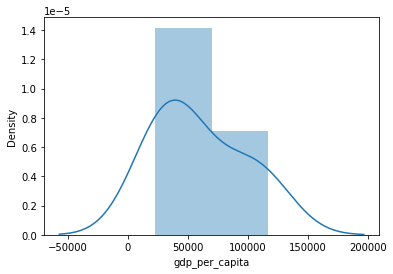

In [93]:
sns.distplot(df_groupby['gdp_per_capita'],kde=True ,hist=True)

<AxesSubplot:xlabel='gdp_per_capita', ylabel='total_cases'>

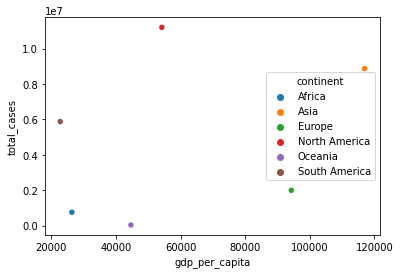

In [86]:
sns.scatterplot(data=df_groupby,y='total_cases', x='gdp_per_capita', hue='continent')

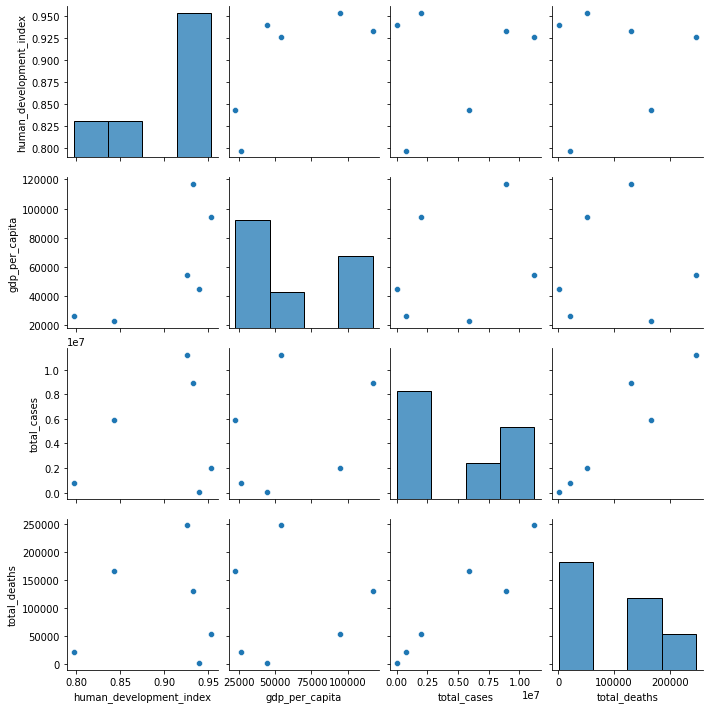

In [64]:
sns.pairplot(data=df_groupby)

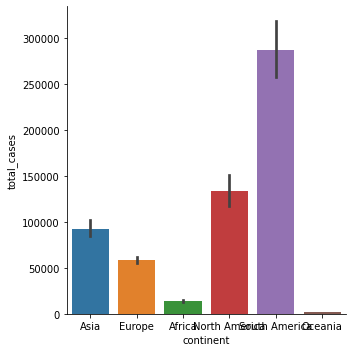

In [88]:
sns.catplot(data=df,x= 'continent',y='total_cases',kind='bar')

In [89]:
df_groupby.to_csv('grouped_data')

### Observations



1).America is the country where it has maximum covid cases while Oceania have least covid cases.

2).gdp_per_capita lies between 40000 to 120000 with average density 1.0 .